In [2]:
import numpy as np
import math as math
import pandas as pd
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import json
from datetime import datetime
import pickle

In [3]:
df = pd.read_json('https://nepsealpha.com/trading/1/history?symbol=NEPSE&resolution=1D&from=1127260800&to=1600473600&pass=ok&currencyCode=NRS')
df

,t,c,o,h,l,v,s
0,1127347200,294.12,294.12,294.12,294.12,0,ok
1,1127606400,294.89,294.89,294.89,294.89,0,ok
2,1127692800,294.67,294.67,294.67,294.67,0,ok
3,1127779200,296.20,296.20,296.20,296.20,0,ok
4,1127865600,297.17,297.17,297.17,297.17,0,ok
...,...,...,...,...,...,...,...
3386,1599955200,1537.25,1528.15,1537.25,1522.28,3386859972,ok
3387,1600041600,1540.51,1545.68,1553.56,1538.43,3134135908,ok
3388,1600128000,1536.03,1544.71,1548.35,1531.05,1800197903,ok
3389,1600214400,1541.40,1537.35,1543.98,1530.67,1845634030,ok


In [4]:
df1 = pd.read_json('https://nepsealpha.com/trading/1/history?symbol=NEPSE&resolution=1D&from=1600819200&to=1601164800&pass=ok&currencyCode=NRS')
df1

,t,c,o,h,l,v,s
0,1600905600,1561.27,1565.31,1565.31,1554.38,2233489024,ok


In [5]:
df2 = pd.read_json('https://nepsealpha.com/trading/1/history?symbol=NEPSE&resolution=1D&from=1601164800&to=1602979200&pass=ok&currencyCode=NRS')
df2

,t,c,o,h,l,v,s
0,1601251200,1560.83,1566.44,1569.31,1557.42,1690154525,ok
1,1601337600,1553.62,1564.92,1564.92,1552.77,1829872968,ok
2,1601424000,1550.43,1561.58,1563.40,1542.57,1953636694,ok
3,1601510400,1571.04,1553.95,1572.94,1553.95,2807708137,ok
4,1601769600,1585.75,1577.77,1588.05,1577.77,3178853719,ok
5,1601856000,1582.12,1587.31,1594.89,1580.65,2578607088,ok
6,1601942400,1586.29,1588.01,1588.01,1581.75,2510585332,ok
7,1602028800,1600.97,1593.04,1602.14,1587.59,3358506296,ok
8,1602115200,1589.63,1607.52,1614.04,1586.96,2862712521,ok
9,1602374400,1576.27,1594.01,1594.36,1574.62,2395432599,ok


In [7]:
df4 = [df, df1, df2]
  
df5 = pd.concat(df4)

df5

,t,c,o,h,l,v,s
0,1127347200,294.12,294.12,294.12,294.12,0,ok
1,1127606400,294.89,294.89,294.89,294.89,0,ok
2,1127692800,294.67,294.67,294.67,294.67,0,ok
3,1127779200,296.20,296.20,296.20,296.20,0,ok
4,1127865600,297.17,297.17,297.17,297.17,0,ok
...,...,...,...,...,...,...,...
9,1602374400,1576.27,1594.01,1594.36,1574.62,2395432599,ok
10,1602460800,1578.01,1580.14,1580.80,1566.70,1949060194,ok
11,1602547200,1568.59,1583.29,1584.28,1567.23,1819638977,ok
12,1602633600,1561.17,1572.35,1573.08,1560.45,1496387992,ok


In [8]:
df6 = df5[['t']].astype('datetime64[s]')
df6

,t
0,2005-09-22
1,2005-09-25
2,2005-09-26
3,2005-09-27
4,2005-09-28
...,...
9,2020-10-11
10,2020-10-12
11,2020-10-13
12,2020-10-14


In [9]:
df5['t']=df6['t']
df5

,t,c,o,h,l,v,s
0,2005-09-22,294.12,294.12,294.12,294.12,0,ok
1,2005-09-25,294.89,294.89,294.89,294.89,0,ok
2,2005-09-26,294.67,294.67,294.67,294.67,0,ok
3,2005-09-27,296.20,296.20,296.20,296.20,0,ok
4,2005-09-28,297.17,297.17,297.17,297.17,0,ok
...,...,...,...,...,...,...,...
9,2020-10-11,1576.27,1594.01,1594.36,1574.62,2395432599,ok
10,2020-10-12,1578.01,1580.14,1580.80,1566.70,1949060194,ok
11,2020-10-13,1568.59,1583.29,1584.28,1567.23,1819638977,ok
12,2020-10-14,1561.17,1572.35,1573.08,1560.45,1496387992,ok


In [10]:
df7 = df5.set_index('t')
df7

,c,o,h,l,v,s
t,,,,,,
2005-09-22,294.12,294.12,294.12,294.12,0,ok
2005-09-25,294.89,294.89,294.89,294.89,0,ok
2005-09-26,294.67,294.67,294.67,294.67,0,ok
2005-09-27,296.20,296.20,296.20,296.20,0,ok
2005-09-28,297.17,297.17,297.17,297.17,0,ok
...,...,...,...,...,...,...
2020-10-11,1576.27,1594.01,1594.36,1574.62,2395432599,ok
2020-10-12,1578.01,1580.14,1580.80,1566.70,1949060194,ok
2020-10-13,1568.59,1583.29,1584.28,1567.23,1819638977,ok


In [11]:
df8=df7[['c']]
df8

,c
t,
2005-09-22,294.12
2005-09-25,294.89
2005-09-26,294.67
2005-09-27,296.20
2005-09-28,297.17
...,...
2020-10-11,1576.27
2020-10-12,1578.01
2020-10-13,1568.59


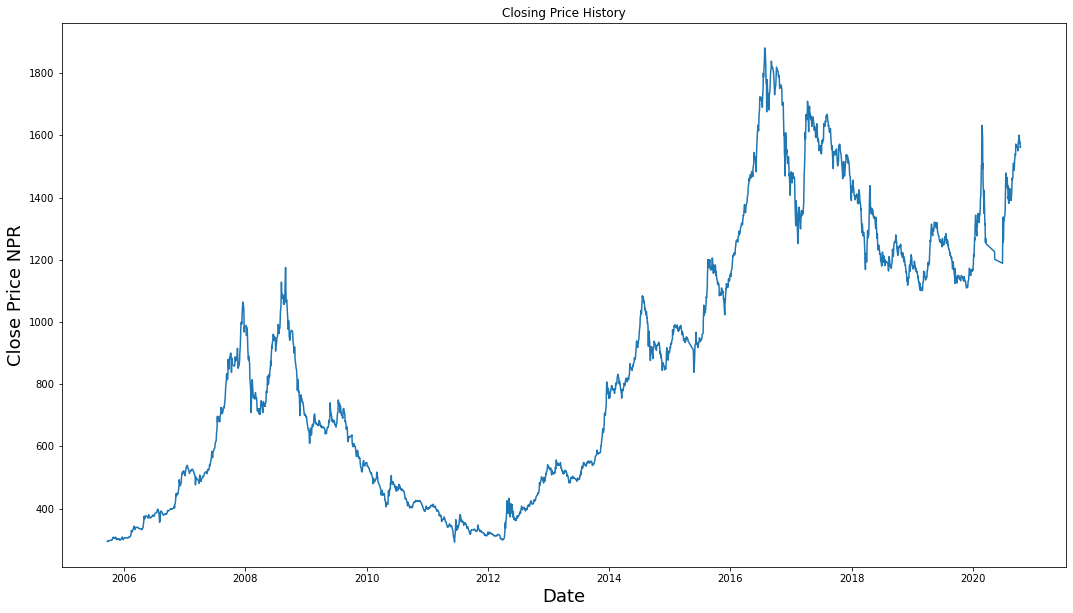

In [12]:
plt.figure(figsize=(18,10))
plt.title('Closing Price History')
plt.plot(df8['c'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price NPR', fontsize=18)
plt.show()

In [13]:
data = df8.filter(['c'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .7 )
training_data_len

2385

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00133379],
       [0.00181824],
       [0.00167983],
       ...,
       [0.80316462],
       [0.79849634],
       [0.79930794]])

In [21]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []
for i in range(500, len(train_data)):
    x_train.append(train_data[i-500:i, 0])
    y_train.append(train_data[i, 0])
    if i<=501:
        print(x_train)
        print(y_train)
        print()

[array([0.00133379, 0.00181824, 0.00167983, 0.00264242, 0.0032527 ,
       0.00313316, 0.00274938, 0.00286263, 0.00313316, 0.00335965,
       0.00399509, 0.00681368, 0.00920444, 0.00838026, 0.00817264,
       0.00863821, 0.00979584, 0.00751203, 0.01005379, 0.00890245,
       0.00653685, 0.00539809, 0.00543584, 0.0053918 , 0.00630407,
       0.00643619, 0.00552392, 0.00578817, 0.00574413, 0.00608387,
       0.00563717, 0.00537293, 0.00614049, 0.00607128, 0.00627261,
       0.00377489, 0.00345402, 0.00446695, 0.00493252, 0.00485073,
       0.00547988, 0.00644248, 0.00699613, 0.0075372 , 0.00816006,
       0.00917928, 0.01014816, 0.0104879 , 0.00534147, 0.00498915,
       0.00571896, 0.00603983, 0.00678222, 0.00708421, 0.00765045,
       0.00844317, 0.00871371, 0.008569  , 0.00845576, 0.00852496,
       0.0084935 , 0.00859417, 0.00871371, 0.00876404, 0.00891503,
       0.0083488 , 0.00836767, 0.00863192, 0.0084998 , 0.00888987,
       0.00898424, 0.00937431, 0.01072069, 0.01022366, 0.0106

In [22]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1885, 500, 1)

In [24]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1885/1885 [==============================] - 397s 207ms/step - loss: 7.4944e-04


In [27]:
test_data = scaled_data[training_data_len - 500: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(500, len(test_data)):
    x_test.append(test_data[i-500:i, 0])

In [28]:
x_test = np.array(x_test)

In [29]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

32/32 [==============================] - 11s 248ms/step


In [31]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

40.30991488268403

<ipython-input-32-b45041c00a1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


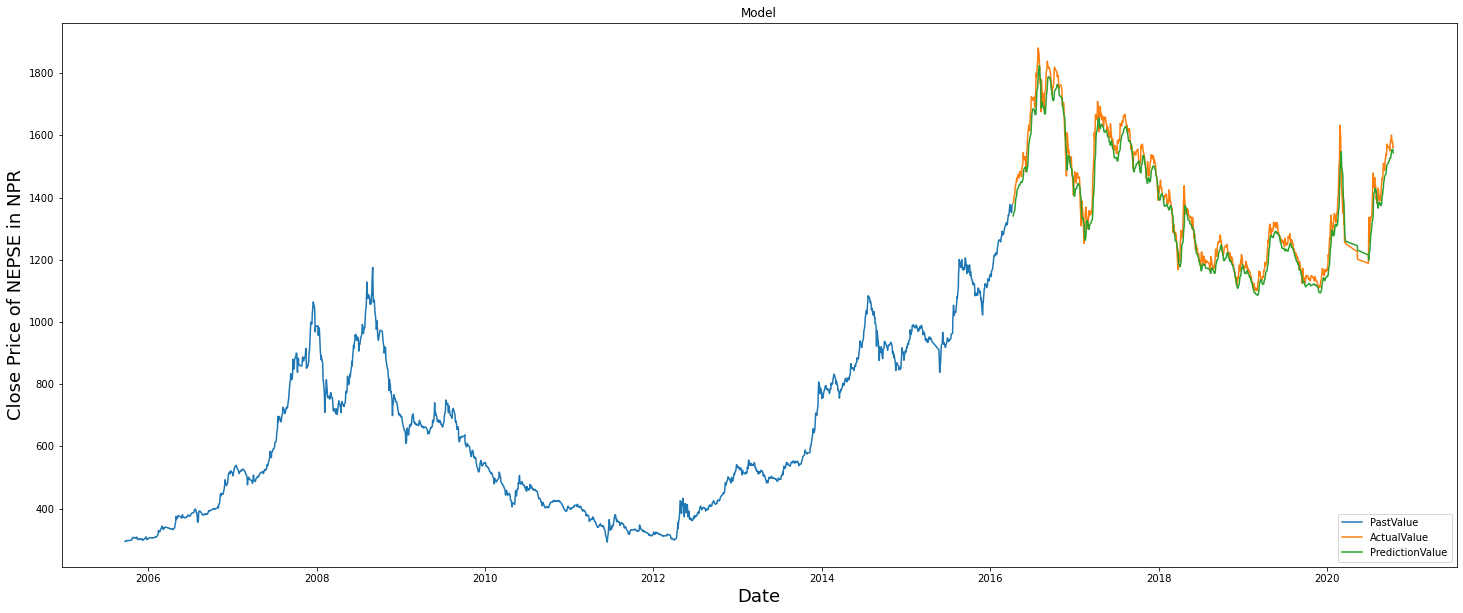

In [32]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure (figsize = (25,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price of NEPSE in NPR', fontsize=18)
plt.plot(train['c'])
plt.plot(valid[['c','Predictions']])
plt.legend(['PastValue', 'ActualValue', 'PredictionValue'], loc = 'lower right')
plt.show()

In [33]:
new_df = df8.filter(['c'])
last_500_days = new_df[-500:].values
last_500_days_scaled = scaler.transform(last_500_days)
X_test = []
X_test.append(last_500_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 134ms/step
[[1538.7874]]


In [34]:
df9 = df8.tail(1)
df9

,c
t,
2020-10-15,1562.46


In [35]:
df10 = df9.assign(Prediction_of_close_price_for_next_day=pred_price)
df10

,c,Prediction_of_close_price_for_next_day
t,,
2020-10-15,1562.46,1538.787354


In [36]:
df11 = df10.rename(columns = {'c':"Today's_close_price"})
df11

,Today's_close_price,Prediction_of_close_price_for_next_day
t,,
2020-10-15,1562.46,1538.787354
